In [1]:
from lib.BBVisualizations import BBVisualization, PlotsEnum
from lib.BBMetrics import MetricsMTEnum, MetricsTGEnum, MetricsSSIMEnum, MetricsClsEnum


c:\Users\User\Documents\Unibo\NLP\BarneyBot\.env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model

## __WordCloud__
WordCloud can show some clues about the frequencies of terms used by a tv serie character, and they can be used in order to recognize him from other characters, which is exactly the idea behind the c-TF-IDF

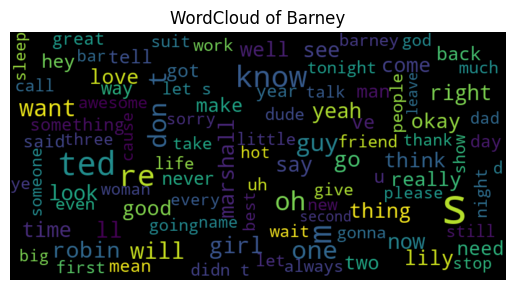

<Figure size 640x480 with 0 Axes>

In [2]:
BBVisualization.load_visualization(PlotsEnum.WC.value, character='Barney').plot()

## __Machine Translation__
Plots of Machine Translation metrics.

It is possible to select if performing a visualization of these metrics on the common dataset imposing the parameter `commondf=True`

* Google BLEU generally produces very low values
* METEOR and Rouge-l tend to low values with METEOR slightly higher values
* EED and TER are in line with the results 
* COMET negatives values

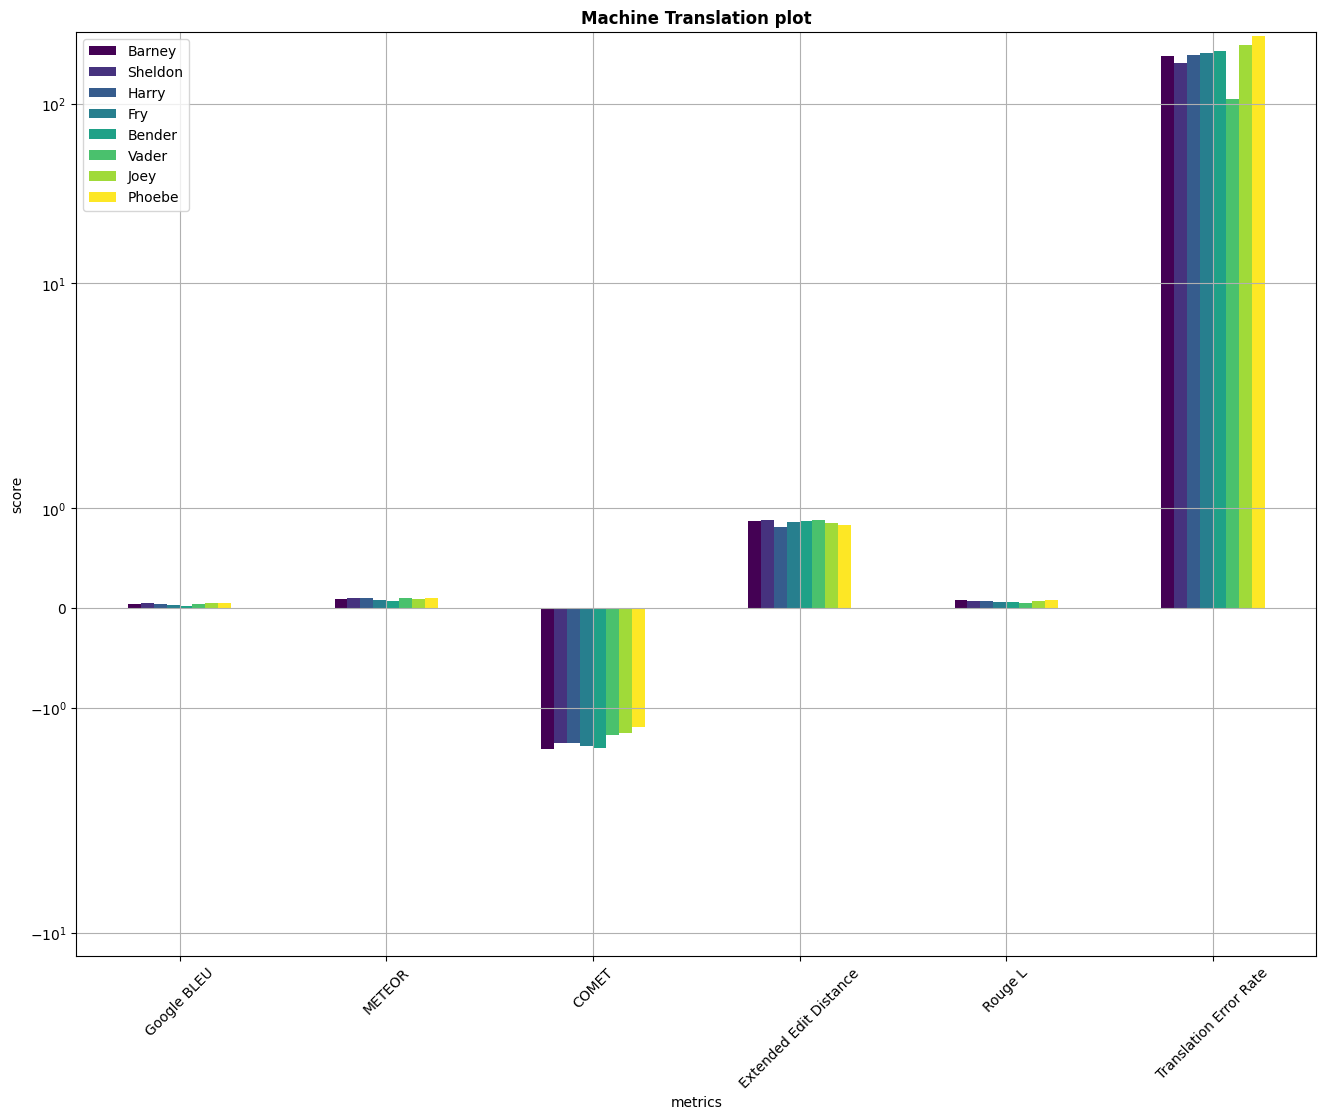

In [3]:
BBVisualization.load_visualization(PlotsEnum.MT.value, commondf=False).plot()

It is also possible to select a subset of metrics to plot as follow

In [4]:
mts = MetricsMTEnum.tolist().copy()
mts.remove(MetricsMTEnum.COMET.value)
mts

['Google BLEU',
 'METEOR',
 'Extended Edit Distance',
 'Rouge L',
 'Translation Error Rate']

* High correlation Google BLEU, METEOR and less but still Rouge L
* Unexpected high correlation TER and Rouge L

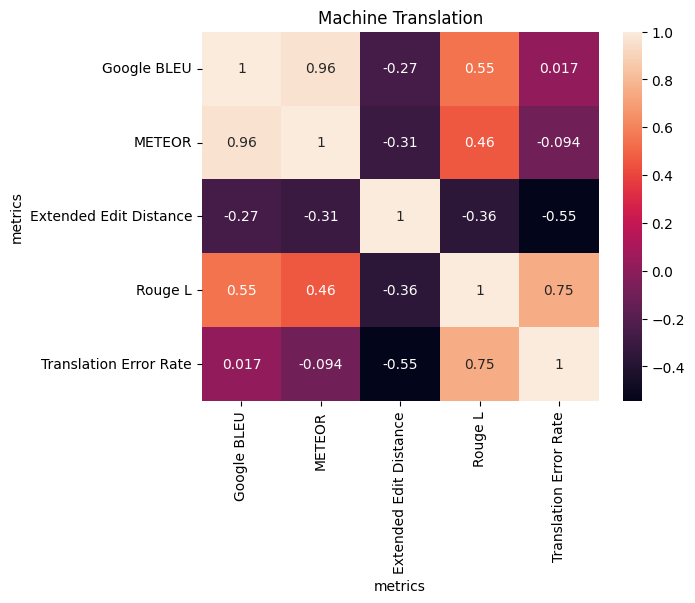

In [5]:
### correlation matrix over metrics
# BBVisualization.load_visualization(PlotsEnum.MT.value, metrics=mts, commondf=False).corr(correlate='metrics') 

### correlation matrix over characters removing COMET
# BBVisualization.load_visualization(PlotsEnum.MT.value, metrics=mts, commondf=False).corr(correlate='characters')

### correlation matrix over metrics removing COMET
BBVisualization.load_visualization(PlotsEnum.MT.value, metrics=mts, commondf=False).corr(correlate='metrics')

Metrics can be computed also on common dataset, but we didn't perform deep analysis due to the complexity of the problem and a poor too small common dataset.

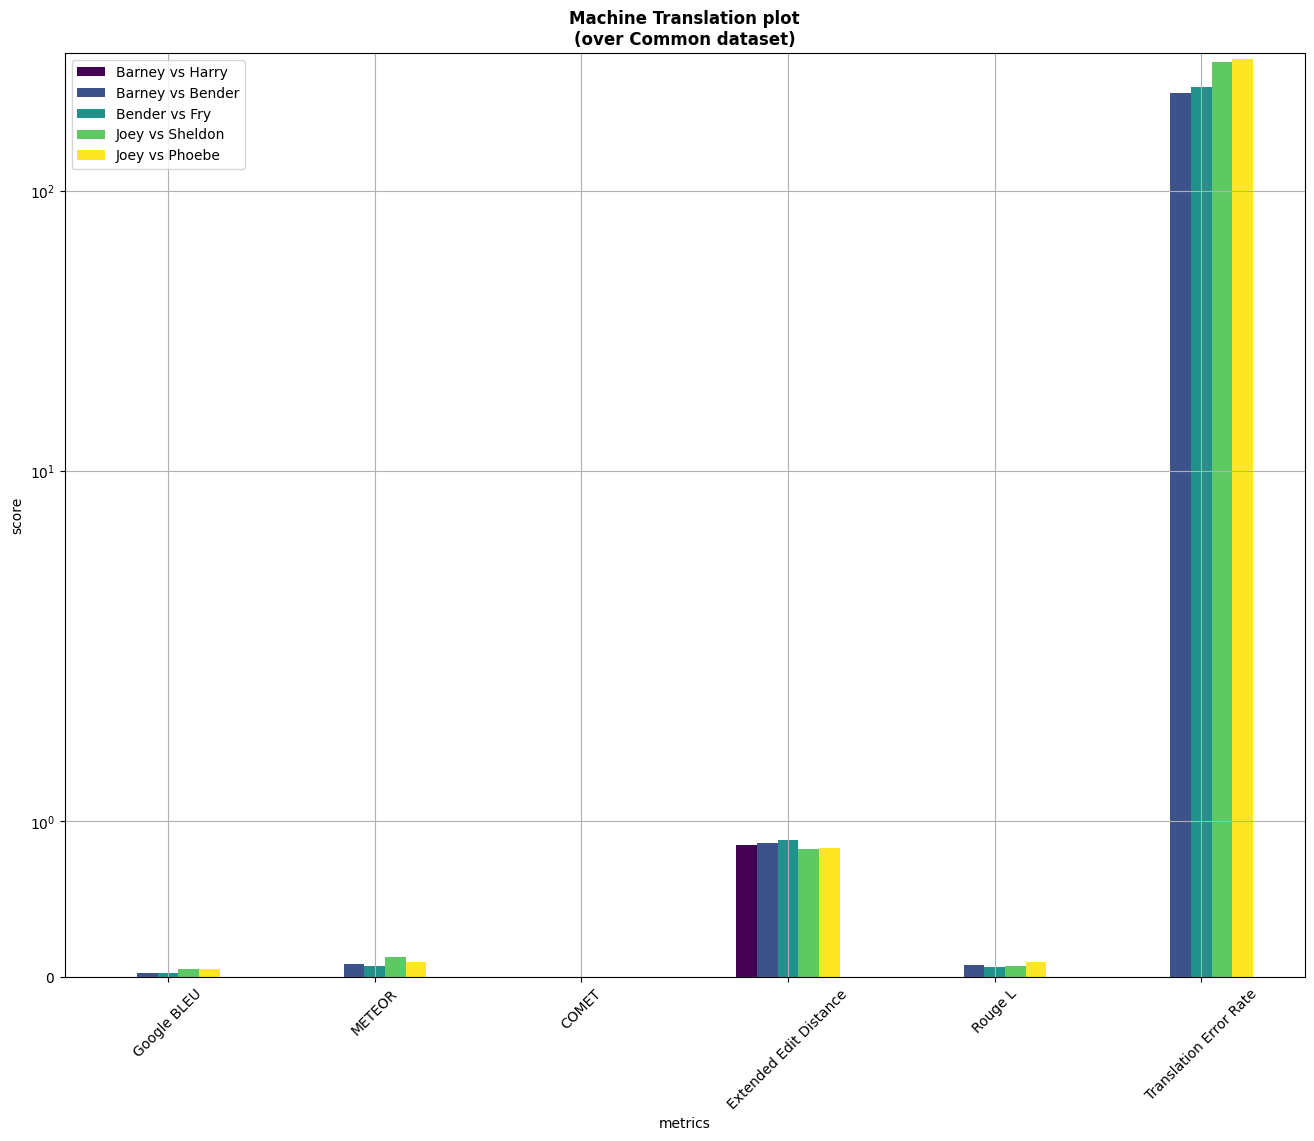

In [6]:
BBVisualization.load_visualization(PlotsEnum.MT.value, commondf=True).plot(logscale=True)

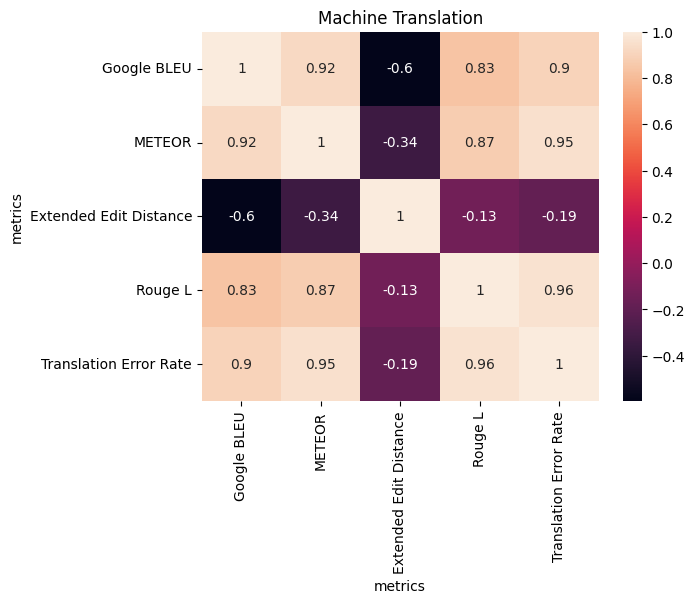

In [7]:
BBVisualization.load_visualization(PlotsEnum.MT.value, metrics=mts, commondf=True).corr(correlate='metrics', debug=False)

## __Text Generation__
Similar analysis can be performed on Text Generation metrics 

* Distinct shows a high range of values, suggesting good general syntactic variety by our chatbots
* Unexpected BLEURT negative values
* Perplexity similarly provides a good sanity check to confirm that all our models have been trained properly
* T5 Grammar Correction Edit Distance demonstrates good performance of the chatbots in generating sentences well-grammar built

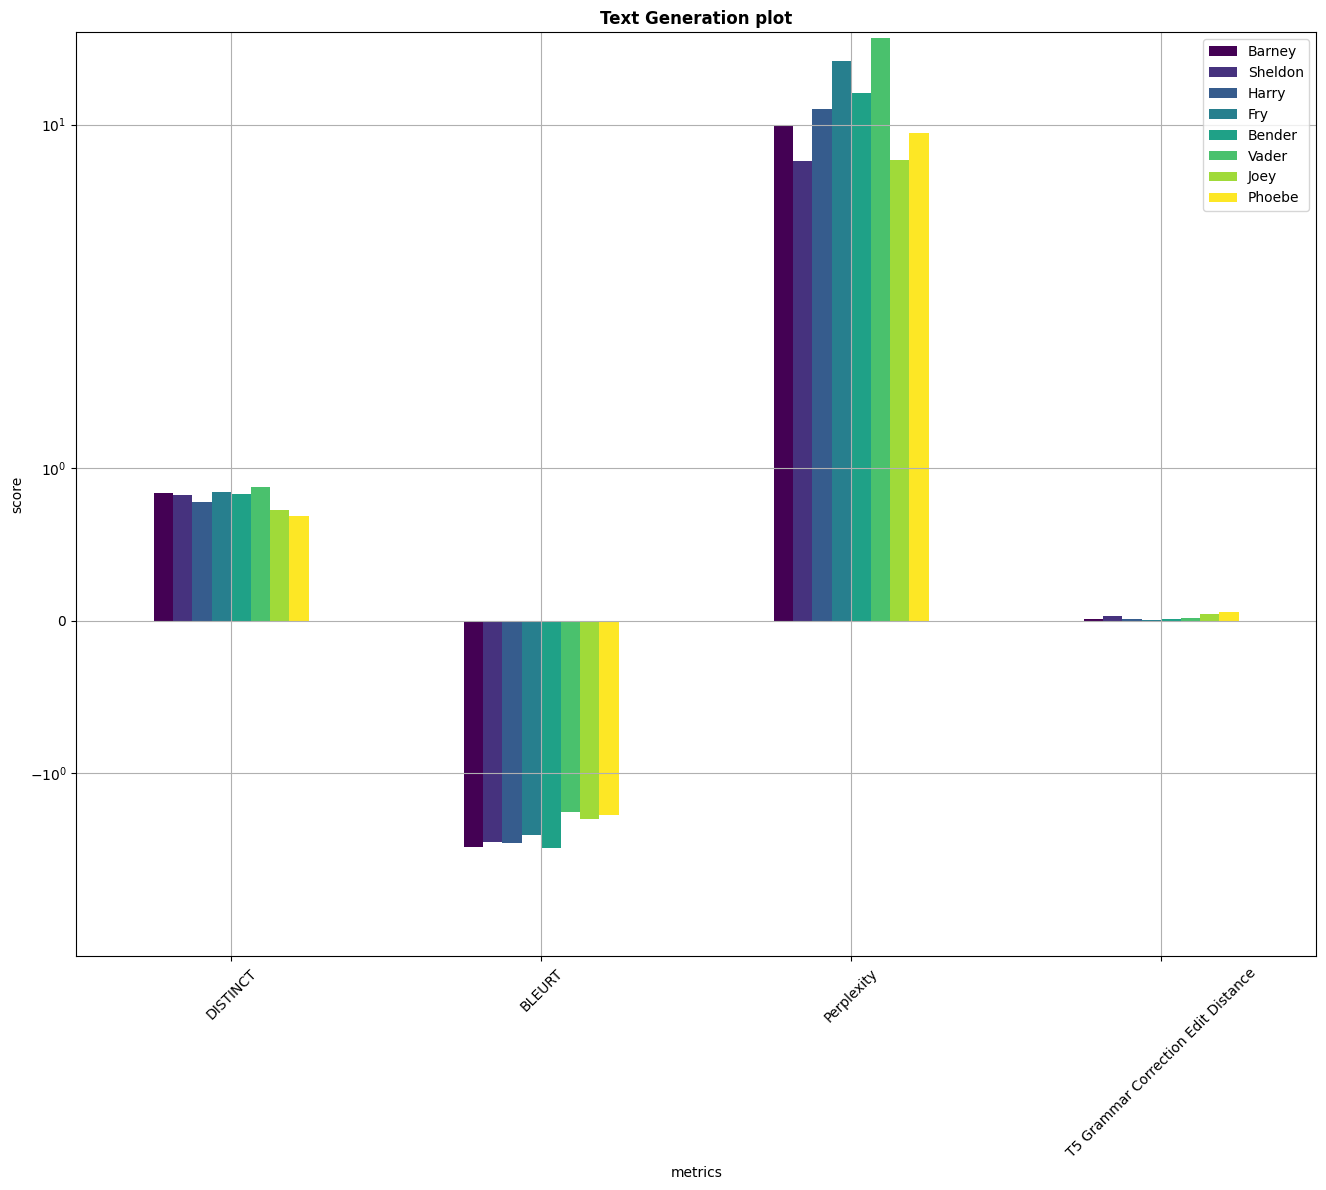

In [8]:
BBVisualization.load_visualization(PlotsEnum.TG.value, commondf=False, debug=False).plot(logscale=True)

Not so much relevant information that can be extrapolated

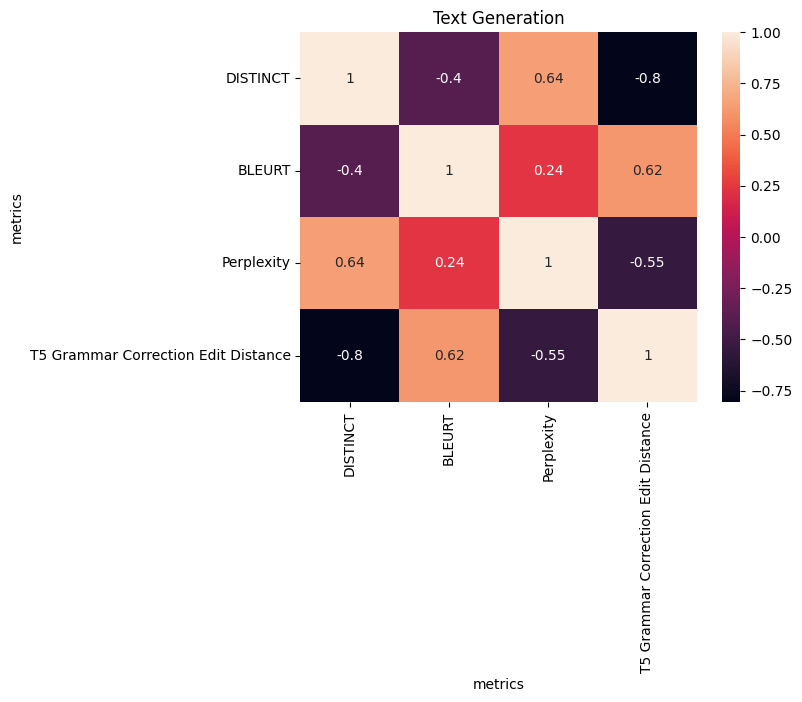

In [9]:
BBVisualization.load_visualization(PlotsEnum.TG.value, commondf=False, debug=False).corr(correlate='metrics')

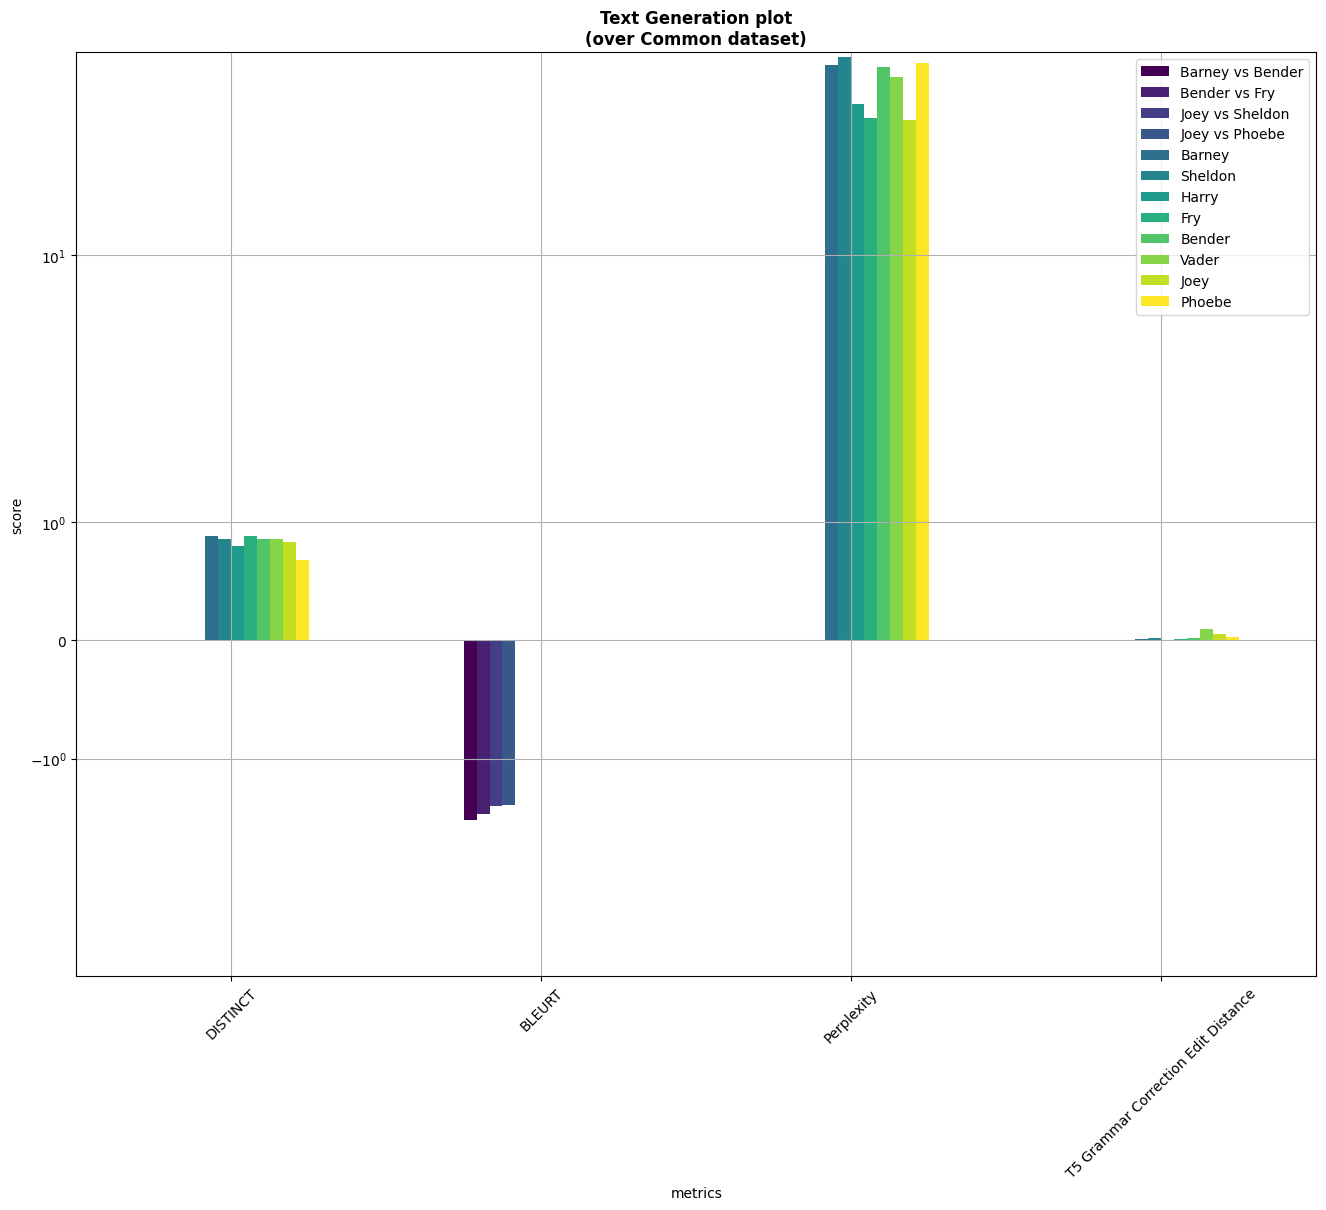

In [10]:
BBVisualization.load_visualization(PlotsEnum.TG.value, commondf=True, debug=False).plot(logscale=True)

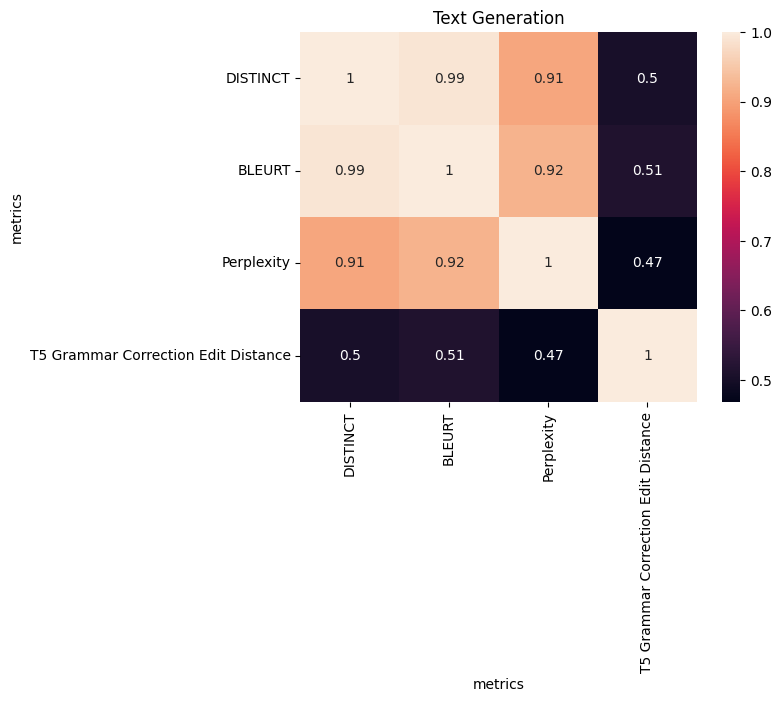

In [11]:
BBVisualization.load_visualization(PlotsEnum.TG.value, commondf=True, debug=False).corr(correlate='metrics')

## __Semantic Similarity__

This set of metrics is arguably the most representative of conversational agents, due to the fact that it does not attempt
to find a perfect match, but rather a likeness between context and (chatbot) response. This line of reasoning is supported
by our results: 
* the highest metric values are obtained by BERTscore
* MPNet or with the semantic answer similarity, values decrease considerably
* Taken together, these metrics seem to provide some insight into the overall behaviour of the chatbot 

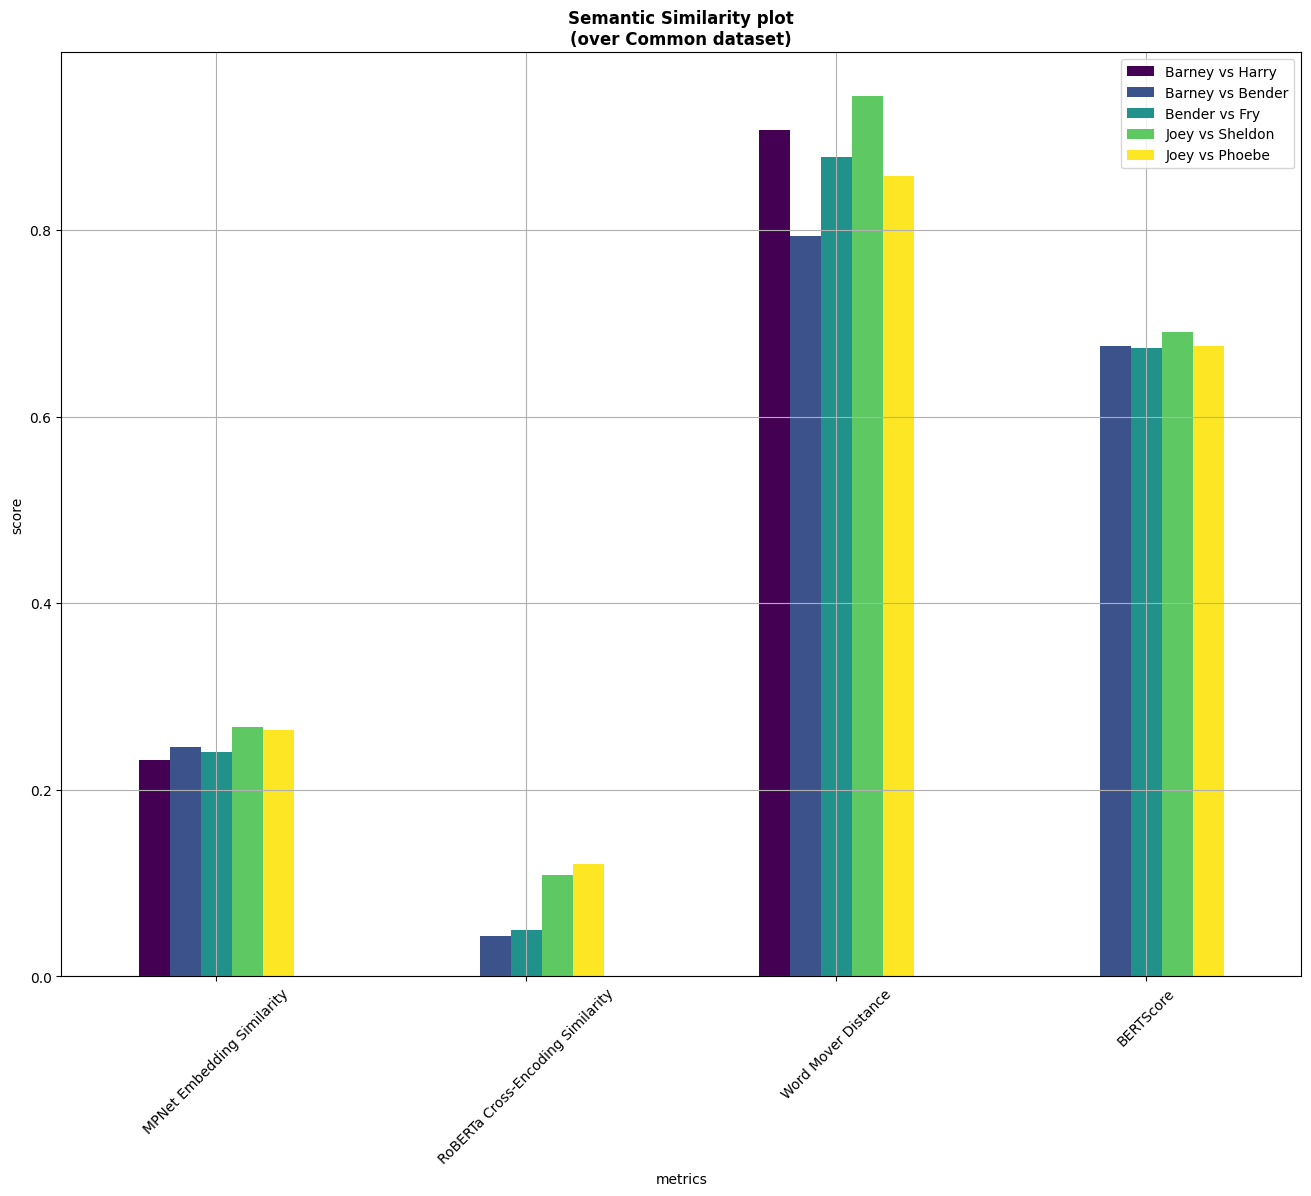

In [12]:
BBVisualization.load_visualization(PlotsEnum.SS.value, commondf=True, debug=False).plot()

Word Mover Distance is a potential candidate, but it is hardly correlated with the other approaches

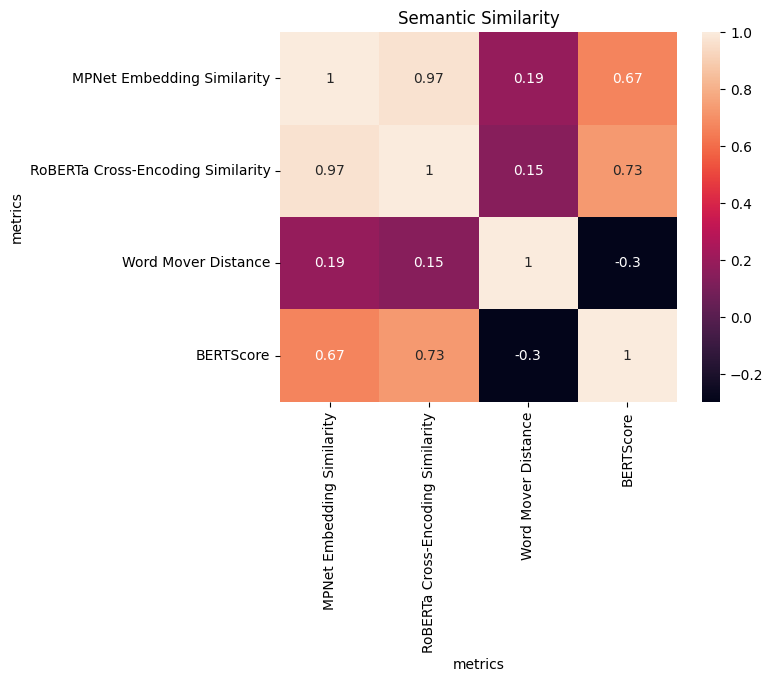

In [13]:
BBVisualization.load_visualization(PlotsEnum.SS.value, commondf=True, debug=False).corr(correlate='metrics')

## __Classification methods__

### Emotion classifier
Results on emotion analysis were, unfortunately, disappointing: although single sentences can be classified more or less correctly, their average quickly degrades to pretty much the same output. We have found no significant differences with respect to the dataset taken under consideration.

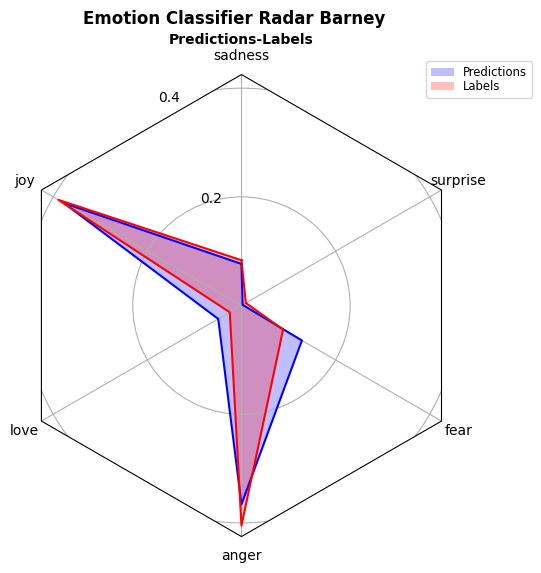

In [14]:
BBVisualization.load_visualization(PlotsEnum.ECR.value, character='Barney').plot()

### Frequency classifier
Good performances on Labels and less but still good on Predictions

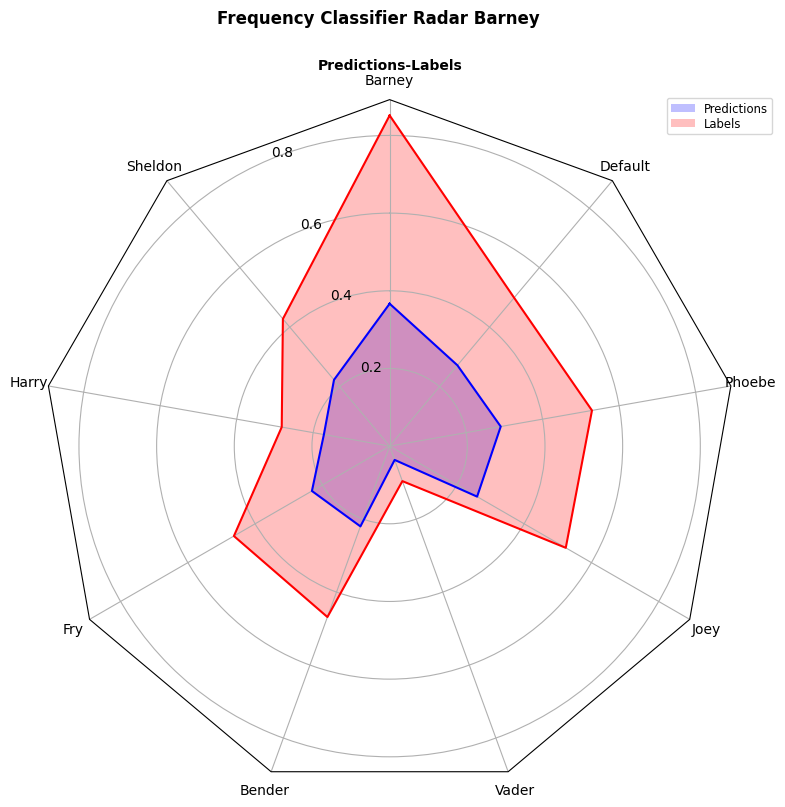

In [15]:
BBVisualization.load_visualization(PlotsEnum.FCR.value, character='Barney').plot()


### Distil-Bert Classifier

In [17]:
# BBVisualization.load_visualization(PlotsEnum.DBCR.value, character='Barney').plot()

## __Kendelltau correlation matrix with human ranking__

Human rankings do not correlate well with any of the metrics we have proposed. We also find confirmation, on a very
small set, of some correlations we have already highlighted

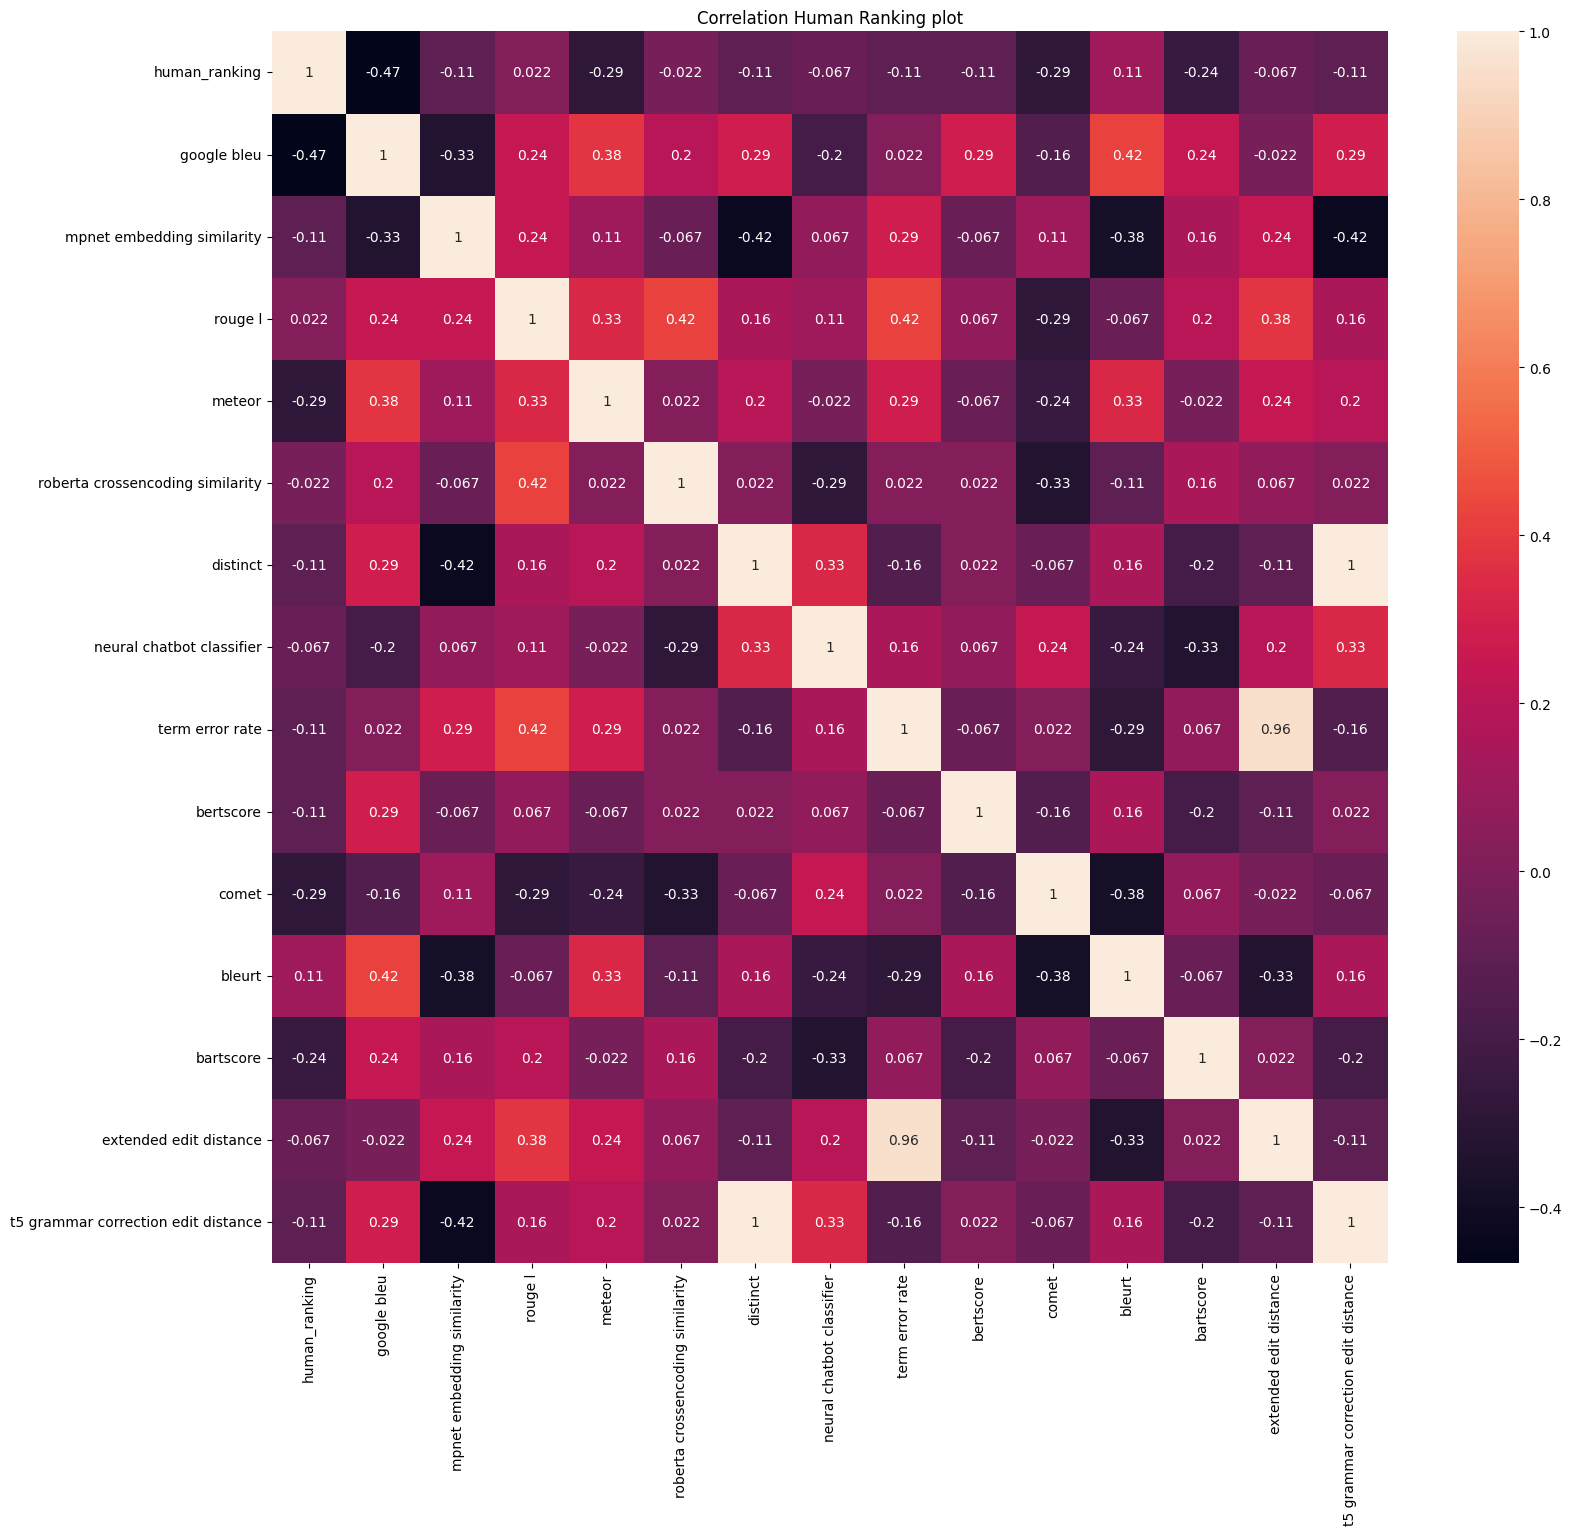

In [ ]:
BBVisualization.load_visualization(PlotsEnum.CHR.value, character='Barney', debug=False).plot()

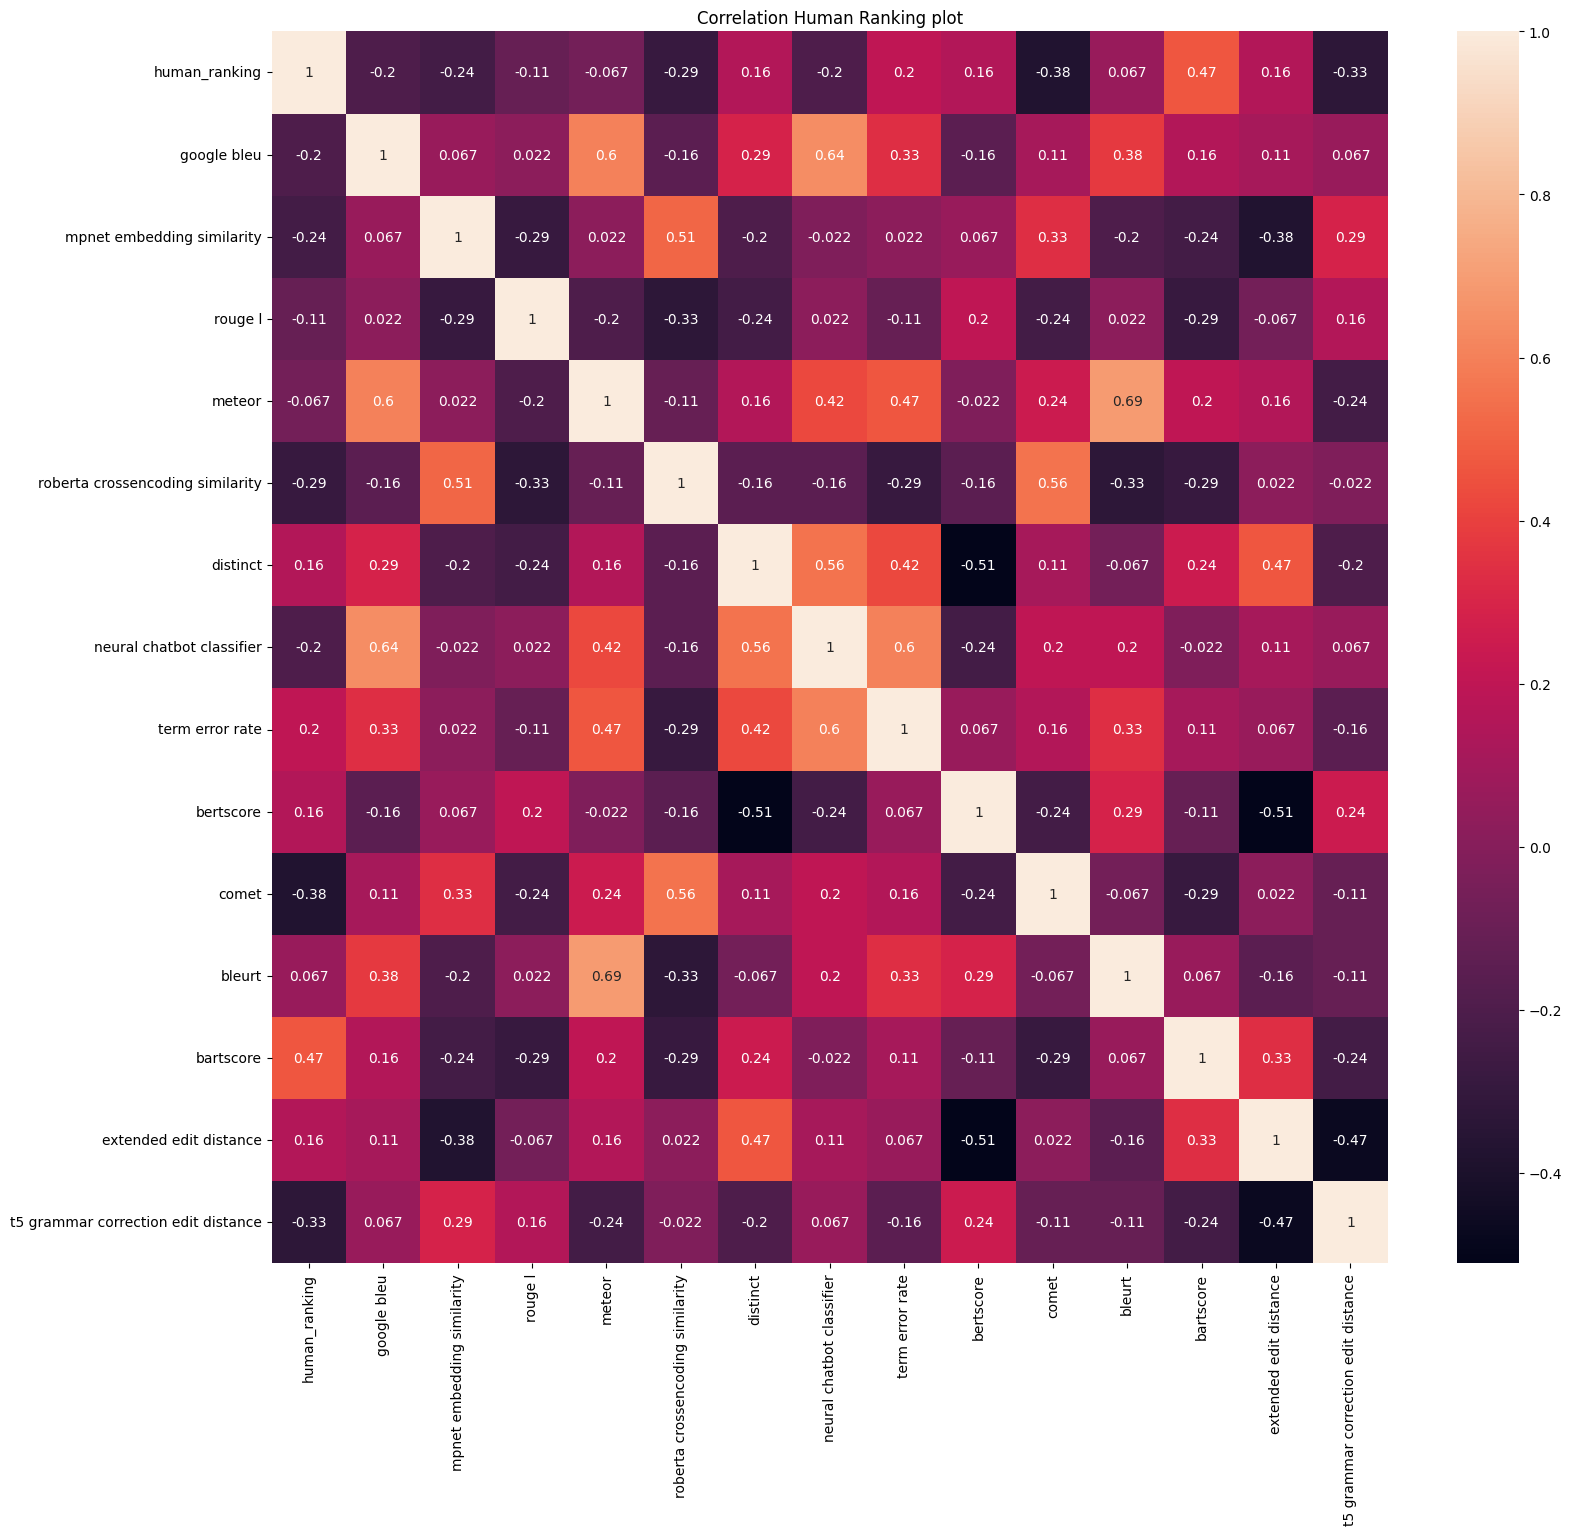

In [ ]:
BBVisualization.load_visualization(PlotsEnum.CHR.value, character='Vader').plot()